In [1]:
import modules.io as io

In [2]:
DATA_KEY    = "TRAIN"
CONFIG_FILE = "./config/resnet_2_large.yaml"

config      = io.load_yaml(CONFIG_FILE)

In [3]:
import factories.dataset_factory as dataset_factory

data    = dataset_factory.get(config, DATA_KEY)

415it [00:00, 4146.64it/s]

centering images


15429it [00:03, 4149.93it/s]
  0%|          | 70/20000 [00:00<03:28, 95.69it/s]

outlier


  1%|          | 150/20000 [00:01<03:28, 95.36it/s]

outlier
outlier
outlier
outlier


  1%|          | 230/20000 [00:02<03:27, 95.21it/s]

outlier


  2%|▏         | 350/20000 [00:03<03:26, 95.36it/s]

outlier


  2%|▏         | 380/20000 [00:03<03:25, 95.25it/s]

outlier


  2%|▏         | 410/20000 [00:04<03:25, 95.17it/s]

outlier


  2%|▏         | 440/20000 [00:04<03:25, 95.09it/s]

outlier


  2%|▏         | 460/20000 [00:04<03:25, 95.10it/s]

outlier


  2%|▎         | 500/20000 [00:05<03:25, 95.12it/s]

outlier
outlier


  3%|▎         | 640/20000 [00:06<03:23, 95.11it/s]

outlier


  4%|▎         | 709/20000 [00:07<03:25, 93.96it/s]

outlier


  4%|▍         | 829/20000 [00:08<03:23, 94.24it/s]

outlier
outlier


  5%|▍         | 929/20000 [00:09<03:21, 94.43it/s]

outlier


  6%|▌         | 1139/20000 [00:12<03:19, 94.75it/s]

outlier


  6%|▌         | 1169/20000 [00:12<03:18, 94.77it/s]

outlier


  6%|▌         | 1209/20000 [00:12<03:18, 94.81it/s]

outlier


  6%|▌         | 1229/20000 [00:12<03:17, 94.86it/s]

outlier


  7%|▋         | 1390/20000 [00:14<03:15, 95.07it/s]

outlier


  7%|▋         | 1420/20000 [00:14<03:15, 95.06it/s]

outlier


  7%|▋         | 1450/20000 [00:15<03:15, 95.09it/s]

outlier


  8%|▊         | 1560/20000 [00:16<03:13, 95.17it/s]

outlier
outlier


  8%|▊         | 1630/20000 [00:17<03:12, 95.20it/s]

outlier


  9%|▊         | 1711/20000 [00:17<03:12, 95.22it/s]

outlier
outlier


  9%|▉         | 1771/20000 [00:18<03:11, 95.25it/s]

outlier


  9%|▉         | 1881/20000 [00:19<03:10, 95.34it/s]

outlier


 10%|▉         | 1981/20000 [00:20<03:08, 95.37it/s]

outlier


 10%|█         | 2051/20000 [00:21<03:08, 95.39it/s]

outlier


 11%|█         | 2181/20000 [00:22<03:06, 95.40it/s]

outlier


 12%|█▏        | 2461/20000 [00:25<03:03, 95.53it/s]

outlier


 12%|█▏        | 2491/20000 [00:26<03:03, 95.53it/s]

outlier


 13%|█▎        | 2521/20000 [00:26<03:03, 95.51it/s]

outlier


 13%|█▎        | 2551/20000 [00:26<03:02, 95.52it/s]

outlier
outlier
outlier


 14%|█▎        | 2731/20000 [00:28<03:00, 95.59it/s]

outlier


 14%|█▍        | 2761/20000 [00:28<03:00, 95.59it/s]

outlier


 15%|█▍        | 2911/20000 [00:30<02:58, 95.66it/s]

outlier


 16%|█▌        | 3111/20000 [00:32<02:56, 95.74it/s]

outlier


 16%|█▌        | 3181/20000 [00:33<02:55, 95.76it/s]

outlier
outlier
outlier


 16%|█▌        | 3231/20000 [00:33<02:55, 95.77it/s]

outlier


 17%|█▋        | 3481/20000 [00:36<02:52, 95.84it/s]

outlier
outlier


 18%|█▊        | 3511/20000 [00:36<02:52, 95.84it/s]

outlier


 18%|█▊        | 3671/20000 [00:38<02:50, 95.87it/s]

outlier
outlier
outlier


 19%|█▉        | 3751/20000 [00:39<02:49, 95.90it/s]

outlier


 20%|██        | 4001/20000 [00:41<02:46, 95.95it/s]

outlier


 20%|██        | 4061/20000 [00:42<02:46, 95.97it/s]

outlier


 23%|██▎       | 4501/20000 [00:46<02:41, 96.04it/s]

outlier


 23%|██▎       | 4541/20000 [00:47<02:40, 96.04it/s]

outlier


 23%|██▎       | 4611/20000 [00:48<02:40, 96.04it/s]

outlier


 23%|██▎       | 4641/20000 [00:48<02:39, 96.04it/s]

outlier


 24%|██▎       | 4701/20000 [00:48<02:39, 96.04it/s]

outlier


 24%|██▍       | 4791/20000 [00:49<02:38, 96.06it/s]

outlier


 24%|██▍       | 4861/20000 [00:50<02:37, 96.07it/s]

outlier
outlier


 25%|██▌       | 5001/20000 [00:52<02:36, 96.09it/s]

outlier


 25%|██▌       | 5081/20000 [00:52<02:35, 96.10it/s]

outlier
outlier


 26%|██▌       | 5111/20000 [00:53<02:34, 96.10it/s]

outlier
outlier


 26%|██▌       | 5141/20000 [00:53<02:34, 96.10it/s]

outlier


 26%|██▌       | 5201/20000 [00:54<02:33, 96.11it/s]

outlier


 26%|██▌       | 5221/20000 [00:54<02:33, 96.12it/s]

outlier


 26%|██▋       | 5271/20000 [00:54<02:33, 96.13it/s]

outlier


 27%|██▋       | 5351/20000 [00:55<02:32, 96.13it/s]

outlier
outlier


 27%|██▋       | 5471/20000 [00:56<02:31, 96.14it/s]

outlier


 29%|██▊       | 5741/20000 [00:59<02:28, 96.17it/s]

outlier


 29%|██▉       | 5781/20000 [01:00<02:27, 96.17it/s]

outlier


 29%|██▉       | 5861/20000 [01:00<02:27, 96.17it/s]

outlier


 29%|██▉       | 5881/20000 [01:01<02:26, 96.17it/s]

outlier
outlier


 30%|██▉       | 5951/20000 [01:01<02:26, 96.17it/s]

outlier


 30%|███       | 6051/20000 [01:02<02:25, 96.18it/s]

outlier


 31%|███       | 6101/20000 [01:03<02:24, 96.19it/s]

outlier


 31%|███       | 6191/20000 [01:04<02:23, 96.18it/s]

outlier
outlier


 32%|███▏      | 6391/20000 [01:06<02:21, 96.18it/s]

outlier


 32%|███▏      | 6441/20000 [01:06<02:20, 96.18it/s]

outlier


 32%|███▏      | 6481/20000 [01:07<02:20, 96.18it/s]

outlier


 33%|███▎      | 6501/20000 [01:07<02:20, 96.18it/s]

outlier


 33%|███▎      | 6621/20000 [01:08<02:19, 96.19it/s]

outlier


 33%|███▎      | 6661/20000 [01:09<02:18, 96.19it/s]

outlier
outlier


 33%|███▎      | 6691/20000 [01:09<02:18, 96.18it/s]

outlier


 34%|███▎      | 6721/20000 [01:09<02:18, 96.17it/s]

outlier
outlier
outlier


 34%|███▍      | 6781/20000 [01:10<02:17, 96.17it/s]

outlier


 34%|███▍      | 6801/20000 [01:10<02:17, 96.17it/s]

outlier


 35%|███▍      | 6901/20000 [01:11<02:16, 96.17it/s]

outlier


 35%|███▍      | 6921/20000 [01:11<02:16, 96.16it/s]

outlier
outlier


 35%|███▍      | 6951/20000 [01:12<02:15, 96.15it/s]

outlier
outlier


 36%|███▌      | 7151/20000 [01:14<02:13, 96.17it/s]

outlier


 36%|███▋      | 7262/20000 [01:15<02:12, 96.19it/s]

outlier
outlier


 37%|███▋      | 7312/20000 [01:16<02:11, 96.19it/s]

outlier
outlier


 37%|███▋      | 7332/20000 [01:16<02:11, 96.19it/s]

outlier
outlier


 37%|███▋      | 7492/20000 [01:17<02:10, 96.20it/s]

outlier


 38%|███▊      | 7542/20000 [01:18<02:09, 96.21it/s]

outlier
outlier


 38%|███▊      | 7572/20000 [01:18<02:09, 96.21it/s]

outlier
outlier


 38%|███▊      | 7602/20000 [01:19<02:08, 96.21it/s]

outlier
outlier


 40%|████      | 8037/20000 [01:24<02:05, 95.39it/s]

outlier
outlier


 41%|████      | 8155/20000 [01:25<02:04, 95.25it/s]

outlier


 41%|████      | 8225/20000 [01:26<02:03, 95.24it/s]

outlier


 42%|████▏     | 8425/20000 [01:28<02:01, 95.26it/s]

outlier


 42%|████▏     | 8465/20000 [01:28<02:01, 95.25it/s]

outlier
outlier


 42%|████▏     | 8484/20000 [01:29<02:01, 95.15it/s]

outlier


 43%|████▎     | 8570/20000 [01:30<02:00, 95.04it/s]

outlier
outlier


 44%|████▎     | 8748/20000 [01:32<01:58, 94.94it/s]

outlier


 44%|████▍     | 8866/20000 [01:33<01:57, 94.83it/s]

outlier


 45%|████▍     | 8976/20000 [01:34<01:56, 94.81it/s]

outlier
outlier


 45%|████▌     | 9038/20000 [01:35<01:56, 94.48it/s]

outlier


 46%|████▋     | 9296/20000 [01:38<01:53, 94.25it/s]

outlier


 47%|████▋     | 9326/20000 [01:38<01:53, 94.25it/s]

outlier
outlier


 47%|████▋     | 9375/20000 [01:39<01:52, 94.16it/s]

outlier


 47%|████▋     | 9412/20000 [01:40<01:52, 94.07it/s]

outlier


 47%|████▋     | 9461/20000 [01:40<01:52, 94.06it/s]

outlier
outlier


 48%|████▊     | 9501/20000 [01:41<01:51, 94.07it/s]

outlier


 48%|████▊     | 9601/20000 [01:42<01:50, 94.08it/s]

outlier


 48%|████▊     | 9661/20000 [01:42<01:49, 94.08it/s]

outlier


 49%|████▉     | 9878/20000 [01:45<01:47, 93.93it/s]

outlier
outlier


 50%|████▉     | 9928/20000 [01:45<01:47, 93.94it/s]

outlier


 50%|████▉     | 9988/20000 [01:46<01:46, 93.94it/s]

outlier


 51%|█████     | 10178/20000 [01:48<01:44, 93.89it/s]

outlier


 52%|█████▏    | 10465/20000 [01:51<01:41, 93.75it/s]

outlier


 53%|█████▎    | 10505/20000 [01:52<01:41, 93.74it/s]

outlier


 53%|█████▎    | 10615/20000 [01:53<01:40, 93.71it/s]

outlier


 54%|█████▍    | 10799/20000 [01:55<01:38, 93.55it/s]

outlier
outlier


 54%|█████▍    | 10878/20000 [01:56<01:37, 93.36it/s]

outlier


 55%|█████▍    | 10932/20000 [01:57<01:37, 93.33it/s]

outlier


 55%|█████▍    | 10992/20000 [01:57<01:36, 93.32it/s]

outlier


 56%|█████▌    | 11138/20000 [01:59<01:35, 93.15it/s]

outlier


 58%|█████▊    | 11615/20000 [02:05<01:30, 92.83it/s]

outlier


 58%|█████▊    | 11665/20000 [02:05<01:29, 92.83it/s]

outlier


 59%|█████▉    | 11855/20000 [02:07<01:27, 92.66it/s]

outlier


 62%|██████▏   | 12339/20000 [02:13<01:22, 92.43it/s]

outlier
outlier


 62%|██████▏   | 12359/20000 [02:13<01:22, 92.43it/s]

outlier


 63%|██████▎   | 12519/20000 [02:15<01:20, 92.42it/s]

outlier


 63%|██████▎   | 12607/20000 [02:16<01:20, 92.40it/s]

outlier


 64%|██████▍   | 12797/20000 [02:18<01:17, 92.38it/s]

outlier


 64%|██████▍   | 12874/20000 [02:19<01:17, 92.36it/s]

outlier


 65%|██████▍   | 12964/20000 [02:20<01:16, 92.36it/s]

outlier


 65%|██████▌   | 13014/20000 [02:20<01:15, 92.35it/s]

outlier


 65%|██████▌   | 13034/20000 [02:21<01:15, 92.35it/s]

outlier


 66%|██████▌   | 13104/20000 [02:21<01:14, 92.34it/s]

outlier
outlier


 66%|██████▌   | 13234/20000 [02:23<01:13, 92.33it/s]

outlier
outlier


 67%|██████▋   | 13424/20000 [02:25<01:11, 92.31it/s]

outlier


 68%|██████▊   | 13534/20000 [02:26<01:10, 92.30it/s]

outlier


 68%|██████▊   | 13584/20000 [02:27<01:09, 92.29it/s]

outlier


 68%|██████▊   | 13604/20000 [02:27<01:09, 92.29it/s]

outlier


 69%|██████▉   | 13844/20000 [02:30<01:06, 92.27it/s]

outlier


 70%|██████▉   | 13923/20000 [02:30<01:05, 92.26it/s]

outlier


 71%|███████   | 14204/20000 [02:34<01:02, 92.10it/s]

outlier


 72%|███████▏  | 14426/20000 [02:36<01:00, 91.97it/s]

outlier


 72%|███████▏  | 14485/20000 [02:37<00:59, 91.96it/s]

outlier


 73%|███████▎  | 14505/20000 [02:37<00:59, 91.96it/s]

outlier


 73%|███████▎  | 14605/20000 [02:38<00:58, 91.95it/s]

outlier


 74%|███████▍  | 14896/20000 [02:42<00:55, 91.80it/s]

outlier


 75%|███████▌  | 15080/20000 [02:44<00:53, 91.70it/s]

outlier


 76%|███████▌  | 15150/20000 [02:45<00:52, 91.70it/s]

outlier


 78%|███████▊  | 15652/20000 [02:50<00:47, 91.59it/s]

outlier


 80%|███████▉  | 15988/20000 [02:54<00:43, 91.53it/s]

outlier


 81%|████████  | 16228/20000 [02:57<00:41, 91.53it/s]

outlier


 81%|████████▏ | 16266/20000 [02:57<00:40, 91.45it/s]

outlier


 83%|████████▎ | 16570/20000 [03:01<00:37, 91.38it/s]

outlier


 83%|████████▎ | 16600/20000 [03:01<00:37, 91.38it/s]

outlier


 83%|████████▎ | 16671/20000 [03:02<00:36, 91.29it/s]

outlier
outlier


 84%|████████▎ | 16716/20000 [03:03<00:35, 91.24it/s]

outlier


 84%|████████▍ | 16790/20000 [03:04<00:35, 91.19it/s]

outlier


 84%|████████▍ | 16880/20000 [03:05<00:34, 91.08it/s]

outlier


 85%|████████▍ | 16965/20000 [03:06<00:33, 91.08it/s]

outlier


 86%|████████▌ | 17227/20000 [03:09<00:30, 91.01it/s]

outlier


 86%|████████▋ | 17267/20000 [03:09<00:30, 91.02it/s]

outlier


 87%|████████▋ | 17334/20000 [03:10<00:29, 90.98it/s]

outlier


 87%|████████▋ | 17372/20000 [03:10<00:28, 90.98it/s]

outlier


 87%|████████▋ | 17421/20000 [03:11<00:28, 90.95it/s]

outlier


 87%|████████▋ | 17477/20000 [03:12<00:27, 90.90it/s]

outlier
outlier


 90%|█████████ | 18024/20000 [03:18<00:21, 90.79it/s]

outlier
outlier


 90%|█████████ | 18093/20000 [03:19<00:21, 90.80it/s]

outlier


 91%|█████████ | 18143/20000 [03:19<00:20, 90.80it/s]

outlier
outlier


 91%|█████████ | 18223/20000 [03:20<00:19, 90.79it/s]

outlier
outlier


 92%|█████████▏| 18373/20000 [03:22<00:17, 90.80it/s]

outlier


 94%|█████████▎| 18732/20000 [03:26<00:13, 90.81it/s]

outlier


 94%|█████████▍| 18892/20000 [03:28<00:12, 90.81it/s]

outlier


 96%|█████████▌| 19152/20000 [03:30<00:09, 90.82it/s]

outlier


 97%|█████████▋| 19493/20000 [03:34<00:05, 90.75it/s]

outlier


 99%|█████████▊| 19703/20000 [03:37<00:03, 90.76it/s]

outlier


100%|██████████| 20000/20000 [03:40<00:00, 90.68it/s]


splitting size


In [4]:
import factories.model_factory as model_factory

model = model_factory.get(config)

/home/marsdenlab/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[None, 3276800]


In [5]:
import factories.preprocessor_factory as prepro_factory

preprocessor = prepro_factory.get(config)

In [6]:
import factories.trainer_factory as trainer_factory

trainer = trainer_factory.get(config)

trainer.setup_directories()

In [7]:
trainer.set_data(data, DATA_KEY)
trainer.set_preprocessor(preprocessor)

In [8]:
trainer.set_model(model)

(9927, 160, 160)
(9927, 160, 160, 1)
(9927, 15)
0: loss=1652062.875

yhat = [-1396.6904  1393.5421  1401.6484 -1398.3721 -1058.0076  1397.3875
  1401.436   1402.4039  1401.0254  1272.7544  1401.2039  1347.412
 -1313.7599 -1402.1611  1371.9762]


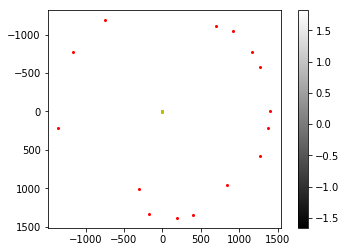

0: loss=1335428.125

yhat = [-1215.2904  1206.8789  1221.7538 -1222.9604  -810.5051  1220.3698
  1213.0099  1209.5105  1225.7942  1140.0118  1206.969   1149.2528
  -995.9255 -1221.7756  1191.707 ]


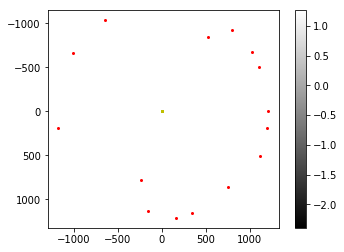

100: loss=1315.28857421875

yhat = [-24.072197  -42.279804   -8.220166  -20.744394  -34.63402    -9.949874
 -22.213171  -35.325684  -54.510876  -13.643745    7.0664916 -39.575756
  -2.6021438  22.164183  -76.21157  ]


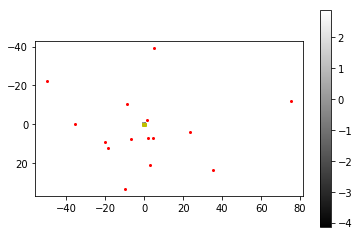

100: loss=1683.77001953125

yhat = [-15.459928  -29.302114  -29.77072   -23.794073   -7.0600753 -15.86986
  -4.578509  -53.528328  -45.91825     5.0610046  -6.2027555 -41.698235
  52.80526     8.18511   -56.029816 ]


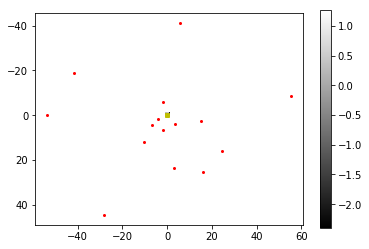

200: loss=308.5990295410156

yhat = [21.7545    -3.5989046 -1.340315   9.74764   -7.588633  39.281292
  0.9283665  5.937912   6.7037077  2.442758  15.230757  26.802755
 17.003609  10.49074   14.152742 ]


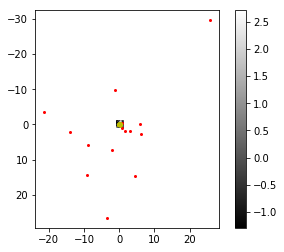

200: loss=469.9268493652344

yhat = [  3.6411676 -12.895662    1.4057614   5.729021  -18.681995   14.312646
 -18.610102    5.384952   20.056767  -14.07992    17.050413   10.206532
  36.118824   22.174524    1.3778728]


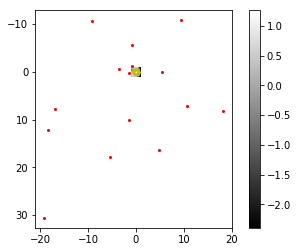

In [ ]:
trainer.train()

In [ ]:
trainer.save()